# Исследование надёжности заёмщиков

По проекту, нужно проанализировать зависимость возврата кредита от семейного положения и количества детей заёмщика.
Данные предоставлены обучающей организацией.# Введение

# Загрузим данные

## используемые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter

## загружаемые данные

In [2]:
# запишем варианты загрузки
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('C:/Users/user/Desktop/tasks/project_2/data.csv')

In [3]:
# соберём функцию первоначального осмотра датафрейма
def start_view(dataframe):
    index = dataframe[dataframe.duplicated(keep = False)].sort_values(by = list(dataframe.columns)).count() # keep = False выведет все совпадения
    print("Количество дубликатов:", index)
    dataframe.info()
    display(dataframe.describe())
    display(dataframe.head())

### посмотрим на исходные данные

In [4]:
start_view(df)

Количество дубликатов: children            106
days_employed         0
dob_years           106
education           106
education_id        106
family_status       106
family_status_id    106
gender              106
income_type         106
debt                106
total_income          0
purpose             106
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### Вывод

Что у нас известно:
1. у нас 12 столбцов, в которых не везде заполнены данные (столбцы days_empoyed и total_income содержит 19351 строчек записей, а все оставльные 21525 записей.
2. можно предположить, что столбцы education , gender , income_type и purpose имеют категориальные значения.


Вывод:
нужно избавиться от пропусков в данных, убрать дубликаты (если они есть).

## Шаг 2. Обработаем данные

### Обработаем пропуски

In [5]:
# поправим отрицательные значения столбца days_employed в положительное
df['days_employed'] = df['days_employed'].abs()

In [6]:
df['education'] = df['education'].str.lower() # приведём столбец с данными об образовании в единый вид

In [7]:
display(df.head()) # посмотрим на результат

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Добавим столбец с маркировкой незаполненности значения:

In [8]:
def is_na(cell_value):
    if cell_value > 0.0:
        return 'True'
    return 'False'

In [9]:
df['years_na'] = df['days_employed'].apply(is_na)

Посмотрим что у нас есть в строках про пропуски

In [10]:
display(df['total_income'].isna().sum()) # проверим кол-во пропусков в столбце total_income
display(df['days_employed'].isna().sum()) # проверим кол-во пропусков в столбце days_employed

2174

2174

Пропущено одинаковое значение в столбцах total_income и days_employed, можно попробовать заполнить пропуски с учётом пола и кол-ва детей.

In [11]:
# для женщин в столбце days_employed
for children in df['children'].unique():
    for education in df['education'].unique():
        median = df.loc[(df['children'] == children) & (df['gender'] == 'F'), 'days_employed'].median()
        df.loc[(df['days_employed'].isna()) & (df['children'] == children) & (df['gender'] == 'F'), 'days_employed'] = median 
        
# для женщин в столбце total_income:
for children in df['children'].unique():
    for education in df['education'].unique():
        median = df.loc[(df['children'] == children) & (df['gender'] == 'F'), 'total_income'].median()
        df.loc[(df['total_income'].isna()) & (df['children'] == children) & (df['gender'] == 'F'), 'total_income'] = median         
        

In [12]:
display(df['total_income'].isna().sum()) # проверим сколько осталось строк с пропущенными значениями
display(df['days_employed'].isna().sum())

690

690

In [13]:
# для мужчин в столбце days_employed
for children in df['children'].unique():
    for education in df['education'].unique():
        median = df.loc[(df['children'] == children) & (df['gender'] == 'M'), 'days_employed'].median()
        df.loc[(df['days_employed'].isna()) & (df['children'] == children) & (df['gender'] == 'M'), 'days_employed'] = median 
        
# для мужчин в столбце total_income:
for children in df['children'].unique():
    for education in df['education'].unique():
        median = df.loc[(df['children'] == children) & (df['gender'] == 'M'), 'total_income'].median()
        df.loc[(df['total_income'].isna()) & (df['children'] == children) & (df['gender'] == 'M'), 'total_income'] = median         
        

In [14]:
# удалим столбец, он нам больше не нужен
df = df.drop(labels='years_na', axis=1)

In [15]:
display(df['total_income'].isna().sum()) # проверим сколько осталось строк с пропущенными значениями
display(df['days_employed'].isna().sum())

0

0

**Вывод**

Не всегда получается заполнять пропуски медианой "максимально точно", нужно балансировать стремление к "точности" и имеющиеся в реальности возможности.

### Исправим ошибки

Проверим столбец возраста.

In [16]:
print(df['dob_years'].unique()) 

[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]


In [17]:
# посмотрим на минимальный и максимальный возраст в столбце dob_years
print(df['dob_years'].min())
print(df['dob_years'].max())

0
75


Минимальное значение возраста "0 лет" выглядит ошибкой во внесении данных.

In [18]:
display(df[df['dob_years'] == 0].head()) # посмотрим на выборку с ошибочным указанием возраста

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль


In [19]:
# посчитаем сколько негодных по возрасту строк
print(f"{len(df[df['dob_years'] == 0]) / df.shape[0]:%}")

0.469222%


Поскольку строчек с нулями в возрасте только 0,5% от всего объёма данных, и невозможно корректно восстановить возраст (нет зависимости ни от одного из имеющихся в распоряжении аналитика столбцов), их лучше удалить. 

In [20]:
# удалим строчки с нулями в столбце dob_years
df = df.drop(df[df['dob_years'] == 0].index)

In [21]:
print(len(df[df['dob_years'] == 0])) # посмотрим на выборку с ошибочным указанием возраста

0


In [22]:
# посмотрим на минимальный и максимальный возраст в столбце dob_years
print(df['dob_years'].min())
print(df['dob_years'].max())

19
75


In [23]:
# введём категории возраста
df['age_category'] = pd.cut(df['dob_years'], 
                              bins=[0,23,30,45,60,100],
                              labels=['student', 'young_specialist','middle_specialist', 'senior_specialist', 'pensioner']
                             )

In [24]:
display(df.head()) # посмотрим что получилось

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,middle_specialist
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,middle_specialist
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,middle_specialist
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,middle_specialist
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,senior_specialist


Теперь у нас есть категории возраста, а в столбце с возрастом нет проблем.

Проверим уникальные значения столбцеов children, education, family_status, gender и income_type

In [25]:
print(df['children'].unique())
print(df['education'].unique())
print(df['family_status'].unique())
print(df['gender'].unique())
print(df['income_type'].unique())

[ 1  0  3  2 -1  4 20  5]
['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
['F' 'M' 'XNA']
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


Что видим:
1. кол-во детей не может быть отрицательным
2. нужно проверить строки с 20 детьми - слишком большое количество, там может быть ошибка
3. проблем в столбце education нет
4. проблем в столбце family_status нет
5. нужно проверить третий параметр пола
6. проблем в столбце income_type нет

Начнём с третьего параметра пола.

In [26]:
display(df[df['gender'] == 'XNA'])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,young_specialist


У нас только одна строчка с неуказанным полом. Восстановить значение пола мы не можем (у нас нет для этого данных), поэтому удалим эту строчку для того, чтобы остальные данные были корректны.

In [27]:
index = df[df['gender'] == 'XNA'].index
df.drop (index, inplace = True)

In [28]:
display(df[df['gender'] == 'XNA']) # проверим, удалился ли нужная строка

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


Уберём проблемы в стобце с количеством детей:

In [29]:
df['children'] = df['children'].abs() # сделаем кол-во детей всегда положительным числом

In [30]:
# проверим, получилось ли убрать отрицательное значение
df_unique_children = df['children'].unique()
print(df_unique_children)

[ 1  0  3  2  4 20  5]


Посмотрим на строчки с 20-ю детьми

In [31]:
display(df[df['children'] == 20])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
606,20,880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья,student
720,20,855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости,middle_specialist
1074,20,3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования,senior_specialist
2510,20,2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью,senior_specialist
3302,20,2047.754733,35,среднее,1,Не женат / не замужем,4,F,госслужащий,0,138626.756600,профильное образование,middle_specialist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль,middle_specialist
21325,20,601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование,middle_specialist
21390,20,1039.186009,53,среднее,1,женат / замужем,0,M,компаньон,0,151652.625895,покупка жилой недвижимости,senior_specialist
21404,20,494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью,senior_specialist


Я сильно сомневаюсь, что в одну выборку попало целых 75 семей с 20-ю детьми. 
Пример 3302 строчки: женщина-госслужащий, не замужем и... 20 детей в 35 лет? Это физически крайне маловероятно (а если бы действительно было так - её бы знала вся страна).
Учитывая, что о семьях с 20 родными детьми пишут отдельные статьи, и обычно это примерно 1-2 семьи на страну (пример статьи https://www.miloserdie.ru/article/samye-mnogodetnye-semi-v-mire/), мы должны предполагать ошибку во внесении данных.
Нужно изменить количество детей в таких строчках с "20" на "2".

In [32]:
# соберём функцию для замены возраста. 
def children_count(column_name):
    if column_name == 20:
        return 2
    else:
        return column_name

In [33]:
# добавим столбец с исправленным значением количества детей
df['children_correct'] = df['children'].apply(children_count)

Теперь можно удалить столбец children как содержащий некорректные данные.

In [34]:
df = df.drop(labels='children', axis=1)

Переименуем столбец children_correct, а то название неудобно отображается в таблице.

In [35]:
df.columns

Index(['days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'age_category', 'children_correct'],
      dtype='object')

In [36]:
df.rename(columns={'children_correct': 'children'}, inplace=True)

In [37]:
display(df.head()) # посмотрим что получилось

,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,children
0,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,middle_specialist,1
1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,middle_specialist,1
2,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,middle_specialist,0
3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,middle_specialist,3
4,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,senior_specialist,0


Переведём данные в столбце days_employed в годы.

In [38]:
df['days_employed'] = df['days_employed']/365

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

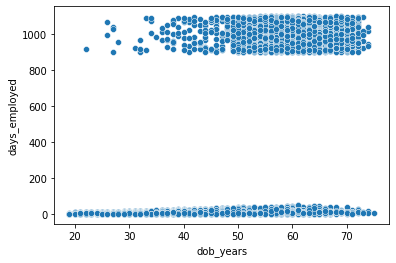

In [39]:
# посмотрим на данные в столбце days_employed
sns.scatterplot(data=df, x=df['dob_years'], y=df['days_employed'])

In [40]:
# значения в 1000 лет работы выглядят как явные ошибки. Предположим, что в таком случае исходные данные были не дни, а часы.
# разделим дополнительно на 24, чтобы получить дни - только для тех случаев, где годы работы больше 100 лет
def days_years(cell_value):
    if cell_value > 100.0:
        return cell_value / 24
    return cell_value

In [41]:
df['years_employed'] = df['days_employed'].apply(days_years)

Посмотрим на диаграмму ещё раз

<AxesSubplot:xlabel='dob_years', ylabel='years_employed'>

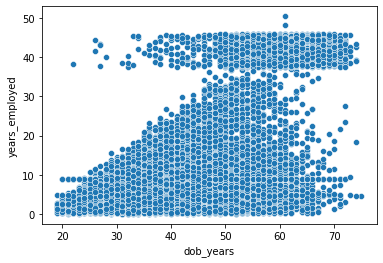

In [42]:
sns.scatterplot(data=df, x=df['dob_years'], y=df['years_employed'])

Судя по диаграмме, у нас ещё есть массив записей "с неочевидными трудовыми подвигами" (верхняя "полоса" распределения), однако это могут быть люди, проживающие на Крайнем Севере или работающие в тяжёлых условиях (или и то, и другое), данных для проверки гипотезы у нас нет - поэтому оставим всё как есть.
Столбец days_employed удалю - все данные сейчас в уже обработанном виде лежат в столбце years_employed.

In [43]:
df = df.drop(labels='days_employed', axis=1) # удалим столбец с днями - у нас уже есть столбец с годами.
print(df.isna().sum())
print(df.shape)

dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
children            0
years_employed      0
dtype: int64
(21423, 13)


In [44]:
# отбросим дробные числа в столбце years_employed - точность после запятой выглядит не нужной.
df['years_employed'] = df['years_employed'].astype('int')

In [45]:
display(df.head()) # посмотрим что получилось

,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,children,years_employed
0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,middle_specialist,1,23
1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,middle_specialist,1,11
2,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,middle_specialist,0,15
3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,middle_specialist,3,11
4,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,senior_specialist,0,38


**Вывод**

Там, где нам не нужна точность с несколькими знаками после запятой, лучше привести к целым числам - так массив данных будет обрабатываться быстрее.
Все столбцы с данными проверили и явные ошибки/проблемы устранили.

### Обработаем дубликаты

In [46]:
# посмотрим сколько явных дубликатов есть в данных
df.duplicated().sum()

71

Этот метод ищет дубликаты путём сравнивания на полные совпадения данных по всем столбцам. Поскольку дубликатов людей не существует, нам необходимо и достаточно присутствия каждой из записей в одном экземпляре

In [47]:
# уберём дубликаты
df = df.drop_duplicates().reset_index(drop = True)

In [48]:
# проверим, все ли убрали
df.duplicated().sum()

0

**Вывод**

Дублирующих записей нет.

### Лемматизация

Приведём к нижнему регистру строку с целью кредита - вдруг там есть какие-либо заглавные буквы

In [49]:
df['purpose'] = df['purpose'].str.lower()

In [50]:
print(df['purpose'].unique()) # посмотрим на уникальные значения

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


In [51]:
# Приведём к общему виду столбец с целями кредита

m = Mystem()

lemmas = m.lemmatize(' '.join(df['purpose']))

from collections import Counter
lemmas_count = Counter(lemmas)

In [52]:
print(lemmas_count.most_common(20)) # посмотрим на 20 самых используемых лемм

[(' ', 54785), ('недвижимость', 6327), ('покупка', 5869), ('жилье', 4436), ('автомобиль', 4284), ('образование', 3995), ('с', 2904), ('операция', 2593), ('свадьба', 2310), ('свой', 2223), ('на', 2210), ('строительство', 1873), ('высокий', 1366), ('получение', 1309), ('коммерческий', 1306), ('для', 1286), ('жилой', 1224), ('сделка', 938), ('дополнительный', 902), ('заниматься', 900)]


Сделаем функцию, которая будет проверять значение в ячейке и если лемма включает нужное нам значение - дописывать в новый столбец общее название.

In [53]:
def purpose_category(cell_value):
    categories = ['автомобиль', 'жилье', 'недвижимость', 'образование', 'свадьба', 'строительство']
    lemmas = m.lemmatize(cell_value) # тут нужно лемматизировать cell_value т.е. это значение текущей ячейки
    for word in categories:
        if word in lemmas:
            return word

df['purpose_category'] = df['purpose'].apply(purpose_category) 
display(df.head())

,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,children,years_employed,purpose_category
0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,middle_specialist,1,23,жилье
1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,middle_specialist,1,11,автомобиль
2,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,middle_specialist,0,15,жилье
3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,middle_specialist,3,11,образование
4,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,senior_specialist,0,38,свадьба


In [54]:
print(df.groupby('purpose_category')['purpose_category'].count()) # посмотрим сколько категорий получилось

purpose_category
автомобиль      4284
жилье           4436
недвижимость    6327
образование     3995
свадьба         2310
Name: purpose_category, dtype: int64


Сведём три разных названия недвижимости к одному.

In [55]:
def final_purpose_category(cell_value):
    categories = ['жилье', 'недвижимость', 'строительство']
    for word in categories:
        if word in cell_value:
            return 'недвижимость'
        else:
            return cell_value

In [56]:
df['final_purpose_category'] = df['purpose_category'].apply(final_purpose_category) 
display(df.head())

,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,children,years_employed,purpose_category,final_purpose_category
0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,middle_specialist,1,23,жилье,недвижимость
1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,middle_specialist,1,11,автомобиль,автомобиль
2,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,middle_specialist,0,15,жилье,недвижимость
3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,middle_specialist,3,11,образование,образование
4,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,senior_specialist,0,38,свадьба,свадьба


In [57]:
df = df.drop(labels='purpose_category', axis=1) 
# удалим столбец с первой итерацией обработанных категорий - у нас уже есть столбец с итоговыми категориями.

In [58]:
# переименуем столбец в просто purpose_category
df.rename(columns={'final_purpose_category': 'purpose_category'}, inplace=True)

**Вывод**

Лемматизация целей кредита позволила выявить основные категории целей.

### Категоризация данных

По идее, категориями являются уникальные значения столбцов education, family_status, income_type, age_category, children,  purpose_category. Для комплекта можем создать отдельную категорию employee_category - чтобы можно было сгруппировать строчки по длительности стажа. Столбец debt является категориальным - там два типа значений: "0" - нет задолженности и "1" - есть задолженность. Переводить его в какую-либо другую форму не хочется - данные уже в бинарной форме, нет смысла их как-либо изменять.

In [59]:
# введём категории длитетльности стажа
df['employee_category'] = pd.cut(df['years_employed'], 
                              bins=[0,3,10,20,100],
                              labels=['low employed', 'middle employed','normal employed', 'senior_employed']
                             )

Для категоризации дохода я использую и квартили, и среднееарифметическое, и медиану: выделю отдельно людей, с доходом ниже медианного по выборке, отдельно - тех, у кого доход выше медианного, но ниже среднеарифметического, отдельно - тех, у кого доход не больше, чем значение квартили 75%, а остальные - будут с наибольшим доходом.

In [60]:
print(df['total_income'].describe()) # посчитаем квартили
print(df['total_income'].mean())
print(df['total_income'].median())

count    2.135200e+04
mean     1.652951e+05
std      9.826609e+04
min      2.066726e+04
25%      1.076489e+05
50%      1.419764e+05
75%      1.957838e+05
max      2.265604e+06
Name: total_income, dtype: float64
165295.0919200141
141976.38959862455


In [61]:
# введём категории дохода
df['income_category'] = pd.cut(df['total_income'], 
                              bins=[0,141976.38959862455,165295.0919200141,1.957838e+05,2.265604e+06],
                              labels=['ниже медианного значения', 'ниже среднеарифметического значения','больше, чем у 75% заёмщиков', 'высокий']
                             )

In [62]:
display(df.head())

,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,children,years_employed,purpose_category,employee_category,income_category
0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,middle_specialist,1,23,недвижимость,senior_employed,высокий
1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,middle_specialist,1,11,автомобиль,normal employed,ниже медианного значения
2,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,middle_specialist,0,15,недвижимость,normal employed,ниже среднеарифметического значения
3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,middle_specialist,3,11,образование,normal employed,высокий
4,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,senior_specialist,0,38,свадьба,senior_employed,ниже среднеарифметического значения


**Вывод**

Для всех вариантов данных есть категории, теперь можно делать выводы.

## Шаг 3. Выводы на основе данных

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [63]:
report = df.groupby('children').agg({'debt': ['mean', 'count']}) # группируем для подсчёта
report = report.rename(columns = {'debt': 'Верхний уровень'}, level = 0)
report = report.rename(columns = {'count': 'Кол-во заемщиков', 'mean': '% невозврата'}, level = 1)
report.index = report.index.rename('Кол-во детей')
report.style.format({('Верхний уровень', '% невозврата'): '{:.2%}', ('Верхний уровень', 'Кол-во заемщиков'): '{:.2f}'})

**Вывод**

Чем больше детей - тем больше заемщиков не вернули кредит. Однако, в абсолютных числах должников с детьми меньше, чем должников без детей.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [64]:
report = df.groupby('family_status').agg({'debt': ['mean', 'count']}) # группируем для подсчёта
report = report.rename(columns = {'debt': 'Верхний уровень'}, level = 0)
report = report.rename(columns = {'count': 'Кол-во заемщиков', 'mean': '% невозврата'}, level = 1)
report.index = report.index.rename('семейное положение')
report.style.format({('Верхний уровень', '% невозврата'): '{:.2%}', ('Верхний уровень', 'Кол-во заемщиков'): '{:.2f}'})

**Вывод**

Меньше всего должников у тех, кто отметил семейное положение "вдовец/вдова", за ними идут люди в разводе. Однако, в абсолютных числах таких людей в выборке не много.
Наиболее надежные кредитозаёмщики с семейным положением "женат/замужем" - у них достаточно низкий процент невозврата (только 7,54%) и при этом их в выборке много.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [73]:
report = df.groupby('income_category').agg({'debt': ['mean', 'count']}) # группируем для подсчёта
report = report.rename(columns = {'debt': 'Верхний уровень'}, level = 0)
report = report.rename(columns = {'count': 'Кол-во заемщиков', 'mean': '% невозврата'}, level = 1)
report.index = report.index.rename('уровень дохода')
report.style.format({('Верхний уровень', '% невозврата'): '{:.2%}', ('Верхний уровень', 'Кол-во заемщиков'): '{:.2f}'})

**Вывод**

Оказалось, что наиболее стабильные заёмщики будут с доходами ниже медианного значения (самые бедные) - 8,07% будут не возвращать кредит в срок, однако - их много в абсолютных цифрах. Наименее надёжные заёмщики оказались в категории дохода "больше, чем у 75% заёмщиков" (больше среднеарифметического, но меньше квартили на 75%) - там должников оказалось 9,18%.
Меньше всего должников в категории с наибольшими доходами ("высокий уровень дохода") - там не вернули в срок только 7,16% заёмщиков.

### Как разные цели кредита влияют на его возврат в срок?

In [72]:
report = df.groupby('purpose_category').agg({'debt': ['mean', 'count']}) # группируем для подсчёта
report = report.rename(columns = {'debt': 'Верхний уровень'}, level = 0)
report = report.rename(columns = {'count': 'Кол-во заемщиков', 'mean': '% невозврата'}, level = 1)
report.index = report.index.rename('Цели кредита')
report.style.format({('Верхний уровень', '% невозврата'): '{:.2%}', ('Верхний уровень', 'Кол-во заемщиков'): '{:.2f}'})

**Вывод**

Люди с целью кредитования "на недвижимость" меньше всего допускают задержек платежей - там только 7,24% невозврата. Наиболее рисковые категории целей кредитования - "на образование" и "на автомобиль": 9,26 % и 9,34% невозврата соответственно.

## Шаг 4. Общий вывод

Мы выявили, что люди с достаточным уровнем дохода допускают просрочку платежа реже, чем те, у кого доходов чуть выше, чем у "среднего заёмщика". Так же, мы выяснили, что кредитование операций с недвижимостью - наиболее безопасная категория целей.

В целом, чем больше факторов будет учтено одновременно - тем более точным будет прогноз. Однако, для точного и многофакторного прогноза выборка тоже должна быть достаточно большой. Если каких-либо уникальных комбинаций в категориях будет мало (мало записей), то выборка будет не репрезентативна, и полученные данные будут иметь сильную погрешность.